<h3>Load the preprocessed files</h3>

In [2]:
#Imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#skitlearn packages
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc, log_loss
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [3]:
# X_train = np.loadtxt('./data/preprocessed/X_train.csv', delimiter=',')
# X_test = np.loadtxt('./data/preprocessed/X_test.csv', delimiter=',')
# y_train = np.loadtxt('./data/preprocessed/y_train.csv', delimiter=',')

In [4]:
preproccessed_train_df = pd.read_csv(r'./preprocessedData/train-preprocessed.csv')
preproccessed_test_df = pd.read_csv(r'./preprocessedData/test-preprocessed.csv')

In [5]:
preproccessed_train_df.shape

(276759, 212)

In [6]:
preproccessed_test_df.shape

(30752, 212)

In [7]:
X_train_df = preproccessed_train_df.drop(columns=["Unnamed: 0", "SK_ID_CURR", "TARGET"])
X_test_df = preproccessed_test_df.drop(columns=["Unnamed: 0", "SK_ID_CURR", "TARGET"])

In [8]:
Y_train_df = preproccessed_train_df[["TARGET"]]
Y_test_df = preproccessed_test_df[["TARGET"]]

In [9]:
print(Y_train_df.shape)
print(X_train_df.shape)

(276759, 1)
(276759, 209)


In [162]:
RF = RandomForestClassifier(n_estimators = 200, random_state = 100, verbose = 1, n_jobs = -1, max_depth=13)
RF.fit(X_train_df,Y_train_df)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   36.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=13, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=100, verbose=1, warm_start=False)

In [163]:
features = list(X_train_df.columns)

In [164]:
feature_importance_values = RF.feature_importances_
feature_importances = pd.DataFrame({'Feature': features, 'Importance': feature_importance_values})

In [165]:
predictions = RF.predict_proba(X_test_df)[:, 1]

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.2s finished


In [166]:
predictions

array([0.17134769, 0.06762062, 0.07468191, ..., 0.06245121, 0.07276464,
       0.09007011])

In [167]:
[fpr, tpr, thr] = roc_curve(Y_test_df, predictions)

In [168]:
print("RandomForest baseline log_loss: %2.3f" % log_loss(Y_test_df, predictions))
print("RandomForest baseline roc auc: %0.3f" % auc(fpr, tpr))

RandomForest baseline log_loss: 0.252
RandomForest baseline roc auc: 0.744


In [169]:
def plot_roc_curve(false_positive, true_positive):
    plt.step(false_positive, true_positive, alpha=0.7, color='seagreen')
    plt.fill_between(false_positive, true_positive, alpha=0.5, color='mediumseagreen')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('ROC-AUC curve: AUC={0:0.3f}'.format(auc(fpr, tpr)))

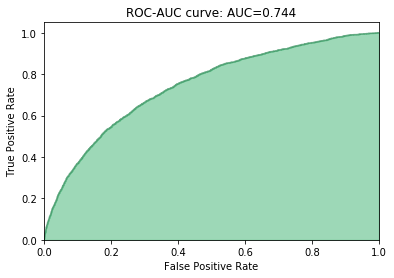

In [170]:
plot_roc_curve(fpr,tpr)

<Figure size 720x1152 with 0 Axes>

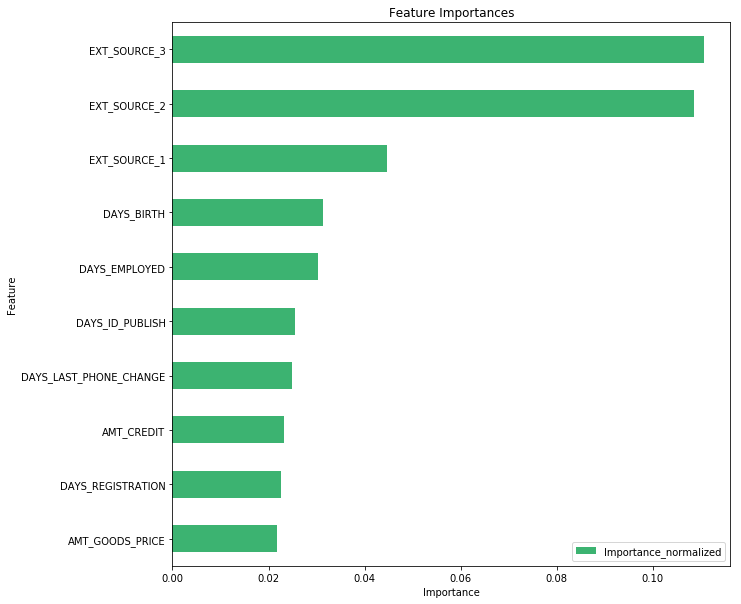

In [171]:
total_feature_importance = feature_importances['Importance'].sum()
feature_importances['Importance_normalized'] = feature_importances['Importance'] / total_feature_importance
feature_importances = feature_importances.sort_values('Importance_normalized', ascending = True).tail(10)

#plotting the top 10 features
plt.figure(figsize = (10, 16))

ax = feature_importances.plot(x = 'Feature' , y = 'Importance_normalized', kind = 'barh', figsize=(10,10), color = 'mediumseagreen')

plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


<h3>Analyzing the model with changes in parameters</h3>

In [172]:
def train_forest(n_estm = 100, m_depth=None):
    RF = RandomForestClassifier(n_estimators = n_estm, random_state = 100, verbose = 1, n_jobs = -1, max_depth=m_depth)
    RF.fit(X_train_df,Y_train_df)
    feature_importance_values = RF.feature_importances_
    feature_importances = pd.DataFrame({'Feature': features, 'Importance': feature_importance_values})
    predictions = RF.predict_proba(X_test_df)[:, 1]
    [fpr, tpr, thr] = roc_curve(Y_test_df, predictions)
    return auc(fpr, tpr)

    

1. n_estimators

In [173]:
n_estms = []
auroc_for_ne = []

In [174]:
for n in range(50,501, 50):
    n_estms.append(n)
    auroc_for_ne.append(train_forest(n_estm=n, m_depth=None))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   15.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   31.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9

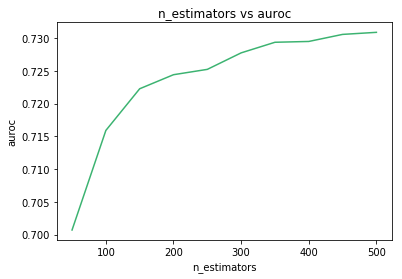

In [177]:
fig = plt.figure()
ax = plt.axes()
plt.xlabel('n_estimators')
plt.ylabel('auroc')
plt.title('n_estimators vs auroc')
ax.plot(n_estms, auroc_for_ne, color="mediumseagreen");

2. max_depth

In [178]:
m_depths = []
auroc_for_md = []

In [179]:
for m in range(5,31, 5):
    m_depths.append(m)
    auroc_for_md.append(train_forest(n_estm=100, m_depth=m))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6

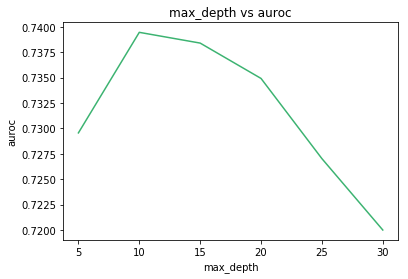

In [182]:
fig = plt.figure()
ax = plt.axes()
plt.xlabel('max_depth')
plt.ylabel('auroc')
plt.title('max_depth vs auroc')
ax.plot(m_depths, auroc_for_md, color="mediumseagreen");